# **Analyze Semantic Change (Ngrams)**
## **Goal**: Use trained `Word2vec` embeddings to examine semantic change over time.

### **Imports**

In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from ngramkit.common.w2v_model import W2VModel
from ngramkit.ngram_analyze.cosine_similarity_time_series import cosine_similarity_over_years, plot_nearest_neighbors
from ngramkit.ngram_analyze.weat_time_series import compute_weat_over_years
from ngramkit.ngram_analyze.semantic_drift import track_yearly_drift, compute_similarity_to_previous_year
from ngramkit.ngram_analyze.average_relatedness_by_year import track_word_semantic_drift

The `ngram-kit` package contains several tools useful in quantifying how much word meanings have changed over the years. Before using these tools, it helps to set a model path variable. Most commonly, this will point to the `norm_and_align` directory. We'll also set a `corpus_path` variable pointing to the yearly corpus data.

In [3]:
model_path =  '/scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_final/norm_and_align'

### `compare_words_cosim` method

Let's say we want to measure the relationship between three pairs of words — _horse_ and _donkey_, _horse_ and _lizard_ , and _horse_ and _amoeba_ — in the 2019 corpus. We first create a `W2VModel` instance for the 2019 embeddings. Then, we call the `compare_words_cosim` method for our words.

In [4]:
year = 2019
model = W2VModel(f'{model_path}/w2v_y{year}_wbnone_vs300_w004_mc001_sg1_e020.kv')

word1, word2 = 'horse', 'mare'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'deer'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'ivy'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'atom'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

cos(Φ) of 'horse' and 'mare' in 2019 = 0.6226
cos(Φ) of 'horse' and 'deer' in 2019 = 0.5273
cos(Φ) of 'horse' and 'ivy' in 2019 = 0.2175
cos(Φ) of 'horse' and 'atom' in 2019 = 0.1459


The results are about what you'd expect!

### `compare_models_cosim` method
Suppose we want to compare the semantic similarity of the _same_ words across _models_. We can use the `compare_models_cosim` method to compute the average cosine similarity between shared words in two models. Or, if we specify the `word` parameter, we can compute similarity for a single word across the models.

In [5]:
model = W2VModel(f'{model_path}/w2v_y2019_wbnone_vs300_w004_mc001_sg1_e020.kv')
reference_model = W2VModel(f'{model_path}/w2v_y2010_wbnone_vs300_w004_mc001_sg1_e020.kv')

cosim_mean, cosim_sd, shared_words = model.compare_models_cosim(reference_model)
print(f"Overall similarity between models:\n  cos(Φ) mean = {cosim_mean:.4f}\n  cos(Φ) SD = {cosim_sd:.4f}\n  shared words: {shared_words}\n")

word = 'horse'
cosim, _, _ = model.compare_models_cosim(reference_model, word)
print(f"Similarity of \'{word}\' between models:\n  cos(Φ) = {cosim:.4f}\n")

Overall similarity between models:
  cos(Φ) mean = 0.7638
  cos(Φ) SD = 0.0934
  shared words: 29984

Similarity of 'horse' between models:
  cos(Φ) = 0.8931



### `track_yearly_drift` function

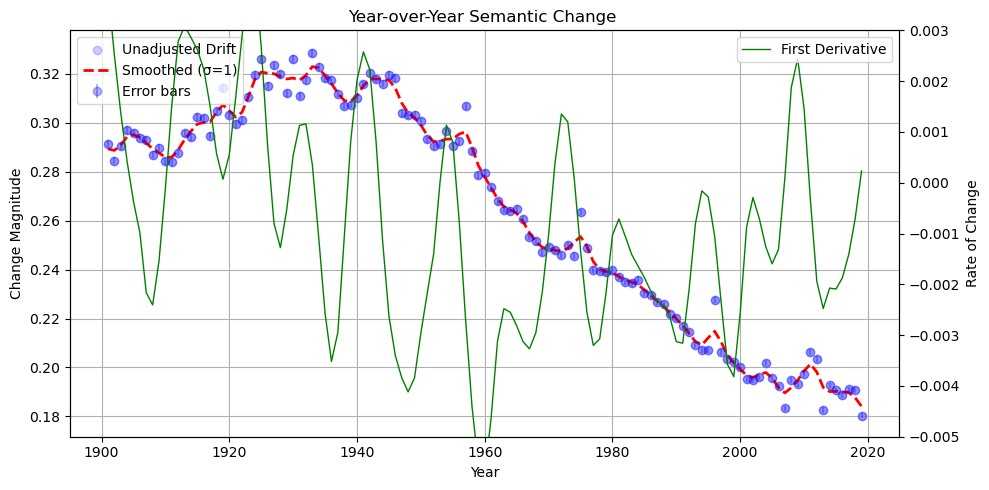

In [6]:
drift_scores = track_yearly_drift(
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=model_path,
    plot=True,
    error_type='CI',
    smooth=True,
    sigma=1,
    confidence=0.99
)

### `mean_cosine_similarity_to_all` class

In [7]:
model = W2VModel(f'{model_path}/w2v_y2019_wbnone_vs300_w004_mc001_sg1_e020.kv')

mean_sim = model.mean_cosine_similarity_to_all('person', '')
print(f"Mean cosine similarity = {mean_sim:.4f}")

Mean cosine similarity = 0.1345


Tracking semantic drift for word: 'human' (Excluding: 0 words)


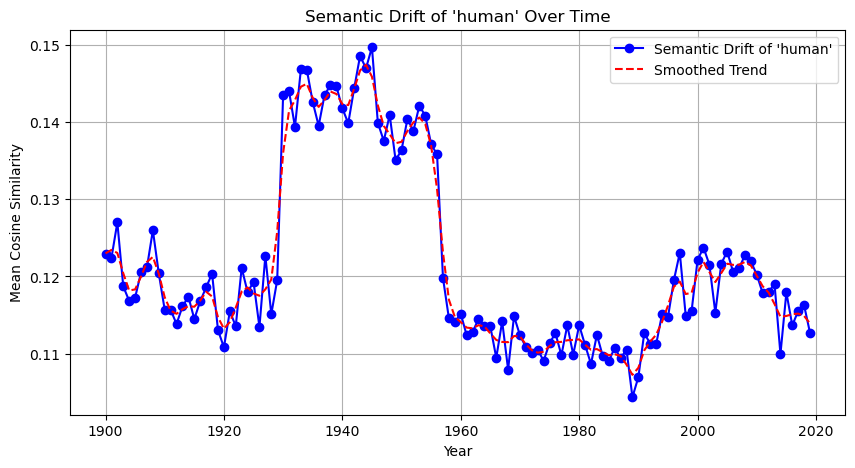

{1900: (0.12293694307774995, 0),
 1901: (0.12238501261388579, 0),
 1902: (0.12700263897912803, 0),
 1903: (0.1187148394472143, 0),
 1904: (0.11683773382141216, 0),
 1905: (0.11726682869694073, 0),
 1906: (0.12053293184595562, 0),
 1907: (0.12117813297286423, 0),
 1908: (0.12598822678573354, 0),
 1909: (0.12039127501356951, 0),
 1910: (0.11568498302445485, 0),
 1911: (0.11568253220940268, 0),
 1912: (0.11384849042714071, 0),
 1913: (0.11612137220464556, 0),
 1914: (0.11738080974242077, 0),
 1915: (0.11449123786538454, 0),
 1916: (0.11681168156372439, 0),
 1917: (0.11859121220337002, 0),
 1918: (0.12036949614521451, 0),
 1919: (0.1130434907033696, 0),
 1920: (0.1108280249736947, 0),
 1921: (0.11547986908171134, 0),
 1922: (0.11356456446191973, 0),
 1923: (0.12112382973166212, 0),
 1924: (0.1179639441753692, 0),
 1925: (0.11930457003006613, 0),
 1926: (0.11347062533218359, 0),
 1927: (0.12267654129197746, 0),
 1928: (0.11510838117724907, 0),
 1929: (0.119530950441104, 0),
 1930: (0.143530

In [11]:
track_word_semantic_drift(
    word='human',
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=f'{model_path}',
    plot=1,
    smooth=True,
    sigma=1
)

### `cosine_similarity_over_years` function

The `cosine_similarity_time_series` function uses the `compare_words_cosim` method to track the relationship between a pair of words across time. Simply specify your two words (`word1` and `word2`), a `start_year` and `end_year`, and the model directory. You'll get a list of years and associated cosine similarities; set `plot=True` if you want to graph them. The model will skip any years for which there is no model or there words aren't in the models' shared vocabulary.

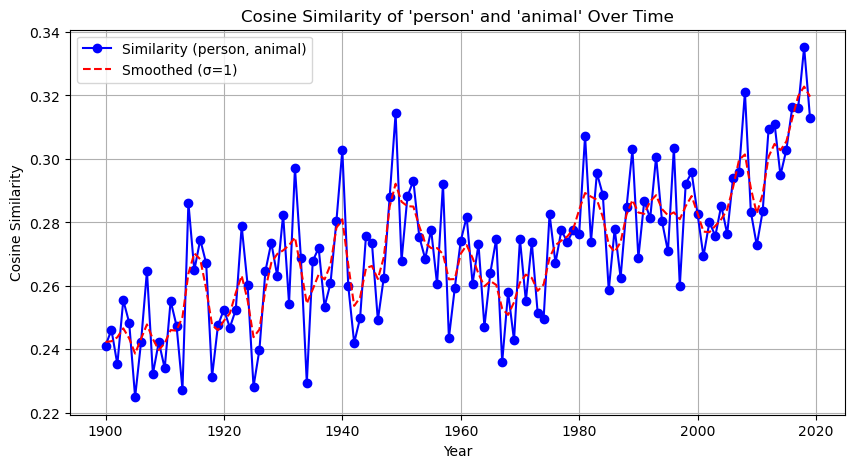

{1900: 0.24111515,
 1901: 0.24617751,
 1902: 0.23527205,
 1903: 0.25552064,
 1904: 0.24839057,
 1905: 0.224915,
 1906: 0.2422329,
 1907: 0.26472077,
 1908: 0.23223764,
 1909: 0.24232991,
 1910: 0.23404284,
 1911: 0.2552755,
 1912: 0.24742387,
 1913: 0.22734271,
 1914: 0.28622088,
 1915: 0.2648819,
 1916: 0.27457616,
 1917: 0.2671353,
 1918: 0.23137297,
 1919: 0.24765512,
 1920: 0.25249523,
 1921: 0.24687871,
 1922: 0.25244987,
 1923: 0.27883166,
 1924: 0.26030272,
 1925: 0.22826068,
 1926: 0.239892,
 1927: 0.26458898,
 1928: 0.27361396,
 1929: 0.26317966,
 1930: 0.28247938,
 1931: 0.25443286,
 1932: 0.29722798,
 1933: 0.26888788,
 1934: 0.22937457,
 1935: 0.26781896,
 1936: 0.271934,
 1937: 0.2534448,
 1938: 0.26077998,
 1939: 0.28040138,
 1940: 0.30275288,
 1941: 0.26005903,
 1942: 0.24203067,
 1943: 0.24985439,
 1944: 0.27587286,
 1945: 0.27353057,
 1946: 0.24921307,
 1947: 0.2625561,
 1948: 0.28814843,
 1949: 0.31439662,
 1950: 0.2678864,
 1951: 0.28819692,
 1952: 0.29313836,
 1953:

In [12]:
cosine_similarity_over_years(
    word1='person',
    word2='animal',
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=f'{model_path}',
    plot=1,
    smooth=True,
    sigma=1
)

### `compute_weat` method
This method runs a Word Embedding Association Test (WEAT) as described in [Caliskan, Bryson, and Narayanan, 2017](https://www.science.org/doi/10.1126/science.aal4230). The WEAT is a close analog of the Implicit Association Test (IAT; [Greenwald, McGhee, & Schwarz, 1995](https://psycnet.apa.org/record/1998-02892-004))—but, whereas the IAT uses reaction latencies to measure a person's cognitive association between two mental category constrasts, the WEAT uses cosine similarities to measure the semantic association between linguistic category contrasts in a corpus.

Just as with the IAT, the WEAT requires that you select two constrasting "target" categories (e.g., _man_ vs. _woman_) and two contrasting "attribute" categories (e.g., _science_ vs. _art_), as well as a list of exemplars of each of these four categories. The `compute_weat` method then:
1. calculates the mean of all pairwise cosine similarities among exemplars within each target–attribute combination (e.g., $\bar c_{man, science}$, $\bar c_{man, art}$, $\bar c_{woman, science}$, $\bar c_{woman, art}$),
2. takes the difference in mean similarity between combinations involving the same target (e.g., $\bar c_{man, science} - \bar c_{man, art}$ and $\bar c_{woman, science} - \bar c_{woman, art}$),
3. subtracts these differences from one another (e.g., $[(\bar c_{man, science} - \bar c_{man, art}) - (\bar c_{woman, science} - \bar c_{woman, art})]$), and
4. divides this difference by the pooled standard deviation across all exemplars for all target–attribute pairs.

This calculation yields an effect size, $d$, analogous to that used in IAT research. Higher scores indicate a stronger relative semantic link between the first target and first attribute (e.g., between _man_ and _science_).

In [14]:
model = W2VModel(f'{model_path}/w2v_y2019_wbnone_vs300_w004_mc001_sg1_e020.kv')

target1 = ["poor", "poverty"]
target2 = ["rich", "wealthy"]
attribute1 = ["happy", "joy"]
attribute2 = ["unhappy", "miserable"]

weat_score, p = model.compute_weat(
    target1,
    target2,
    attribute1,
    attribute2,
    num_permutations=1_000
)

print(f"WEAT effect size (Cohen's d) = {weat_score:.4f}, p = {p:.4f}")

WEAT effect size (Cohen's d) = -1.0103, p = 0.6660


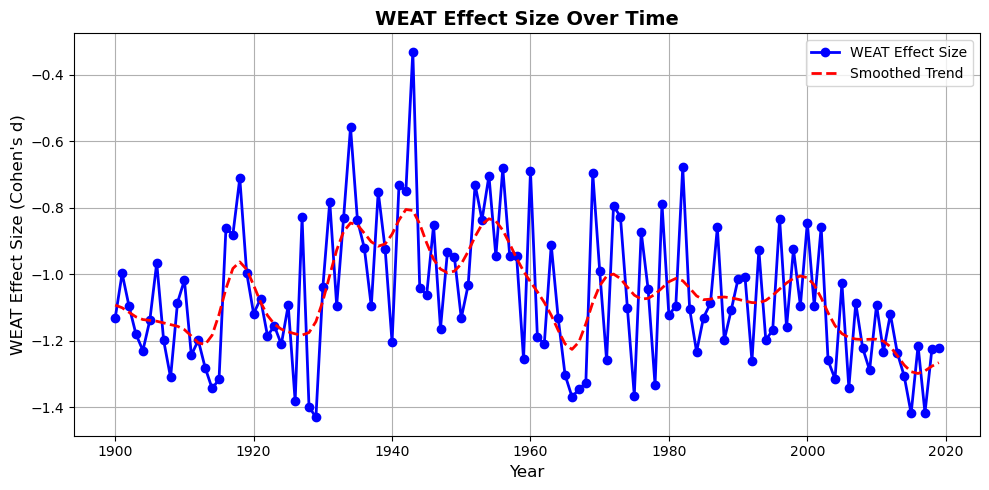

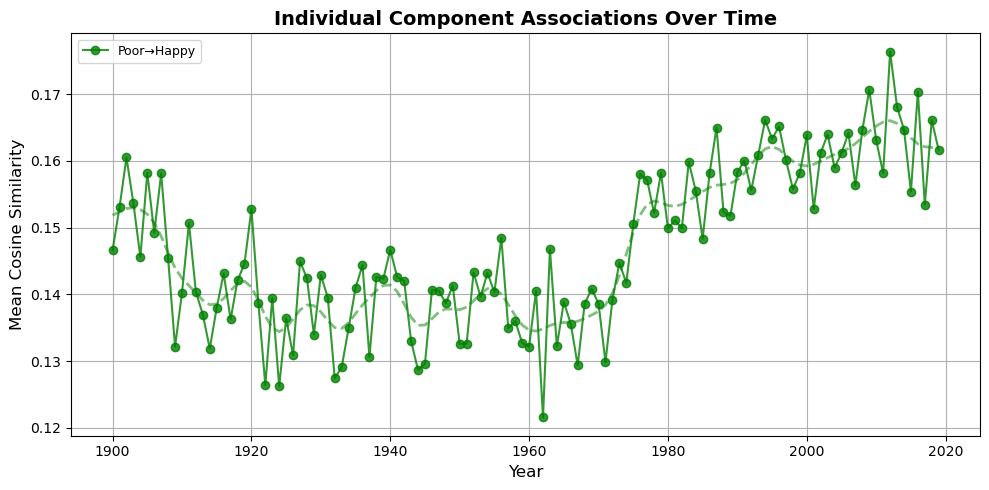

{1900: (-1.1308695,
  None,
  None,
  {'Poor→Happy': 0.14664218,
   'Poor→Unhappy': 0.23119162,
   'Rich→Happy': 0.18827456,
   'Rich→Unhappy': 0.1776408}),
 1901: (-0.99722147,
  None,
  None,
  {'Poor→Happy': 0.15305592,
   'Poor→Unhappy': 0.22712554,
   'Rich→Happy': 0.1849384,
   'Rich→Unhappy': 0.17955483}),
 1902: (-1.0959105,
  None,
  None,
  {'Poor→Happy': 0.16051768,
   'Poor→Unhappy': 0.23223972,
   'Rich→Happy': 0.16613838,
   'Rich→Unhappy': 0.1537845}),
 1903: (-1.1798965,
  None,
  None,
  {'Poor→Happy': 0.15362267,
   'Poor→Unhappy': 0.23748882,
   'Rich→Happy': 0.15456446,
   'Rich→Unhappy': 0.1554557}),
 1904: (-1.2290937,
  None,
  None,
  {'Poor→Happy': 0.14560623,
   'Poor→Unhappy': 0.234511,
   'Rich→Happy': 0.18856351,
   'Rich→Unhappy': 0.17322084}),
 1905: (-1.138228,
  None,
  None,
  {'Poor→Happy': 0.15819767,
   'Poor→Unhappy': 0.23702505,
   'Rich→Happy': 0.17702378,
   'Rich→Unhappy': 0.17595544}),
 1906: (-0.96568686,
  None,
  None,
  {'Poor→Happy': 0.14

In [17]:
target1 = {'Poor': ['poor', 'penniless', 'needy', 'destitute', 'lower-class', 'beggar', 'panhandle']}
target2 = {'Rich': ['wealthy', 'upper-class', 'affluent', 'propertied']}
attribute1 = {'Happy': ['happy', 'joyful', 'joyous', 'glad', 'blissful', 'merry', 'cheerful', 'content', 'tranquil']}
attribute2 = {'Unhappy': ['unhappy', 'miserable', 'misery', 'sad']}

compute_weat_over_years(
    target1,
    target2,
    attribute1,
    attribute2,
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=f"{model_path}",
    num_permutations=0,
    plot=1,
    smooth=True,
    sigma=2,
    return_std=False,
    return_associations=True,
    plot_associations=['Poor→Happy']
)

### `plot_nearest_neighbors` function

This function plots the N nearest neighbors to a target word for a specific year, showing their cosine similarity scores in a horizontal bar chart.

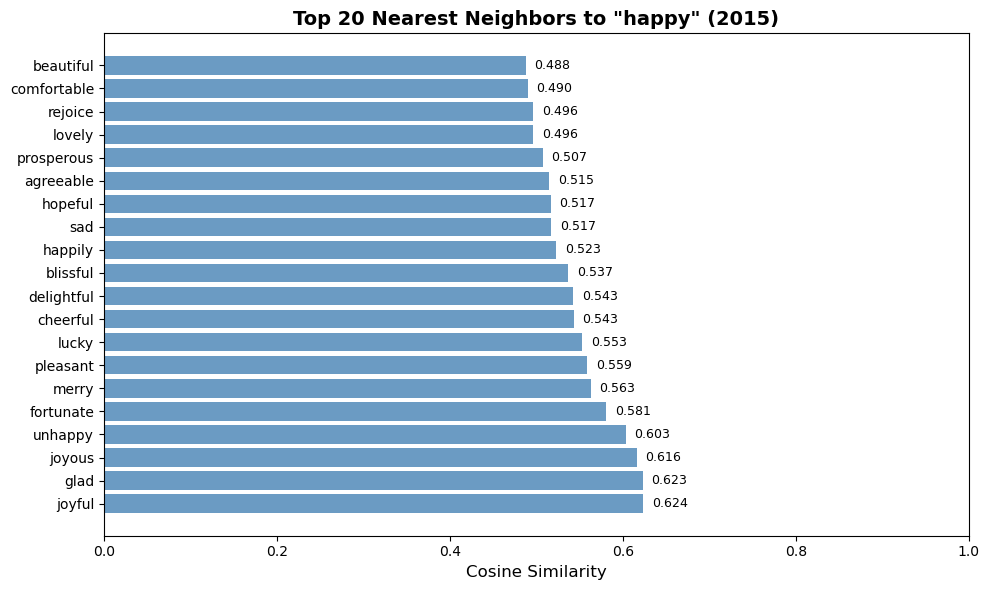


Nearest neighbors:
  joyful: 0.6237
  glad: 0.6227
  joyous: 0.6162
  unhappy: 0.6033
  fortunate: 0.5805
  merry: 0.5628
  pleasant: 0.5589
  lucky: 0.5526
  cheerful: 0.5432
  delightful: 0.5426
  blissful: 0.5368
  happily: 0.5232
  sad: 0.5170
  hopeful: 0.5167
  agreeable: 0.5150
  prosperous: 0.5071
  lovely: 0.4965
  rejoice: 0.4962
  comfortable: 0.4898
  beautiful: 0.4876


In [16]:
neighbors = plot_nearest_neighbors(
    word='happy',
    year=2015,
    model_dir=model_path,
    n=20
)

print("\nNearest neighbors:")
for word, similarity in neighbors:
    print(f"  {word}: {similarity:.4f}")